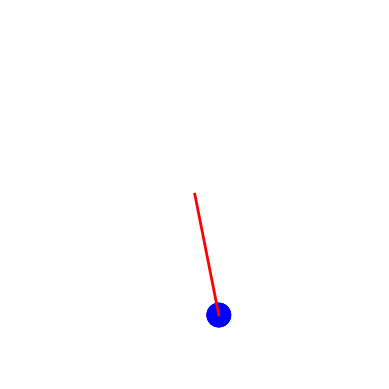

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
g = 9.81   # acceleration due to gravity
l = 1.0   # length of pendulum

# Time settings
dt = 1/60  # Time step
T = 10     # Total simulation time
time = np.arange(0, T, dt)

# Initial conditions
theta = np.zeros(len(time))
omega = np.zeros(len(time))
theta[0] = np.pi / 4  # Starting angle (45 degrees from the vertical)

# Euler's method
for i in range(1, len(time)):
    omega[i] = omega[i-1] - (g/l) * np.sin(theta[i-1]) * dt
    theta[i] = theta[i-1] + omega[i] * dt

# Animation
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', 'box')
ax.axis('off')

# Draw pendulum rod and bob
line, = ax.plot([], [], 'r-', lw=2)
bob = plt.Circle((l*np.sin(theta[0]), -l*np.cos(theta[0])), 0.1, fc='b')

def init():
    line.set_data([], [])
    ax.add_patch(bob)
    return line, bob

def animate(i):
    x = [0, l*np.sin(theta[i])]
    y = [0, -l*np.cos(theta[i])]
    line.set_data(x, y)
    bob.center = (x[1], y[1])
    return line, bob

anim = animation.FuncAnimation(fig, animate, frames=len(time), init_func=init, blit=True, interval=dt*1000)
anim.save('pendulum.mov')